In [15]:
from datascience_starter.models.glm import GLM
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymc3 as pm

In [9]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, :2]
y = ((iris.target != 0) * 1)
print(f"X shape is {X.shape}, y shape is {y.shape}")

X shape is (150, 2), y shape is (150,)


Alpha: [-8.32330389], Beta: [[ 3.38829757 -3.1645277 ]]


<AxesSubplot:>

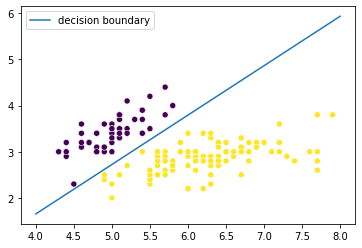

In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X, y)
alpha = model.intercept_
beta = model.coef_
print(f"Alpha: {alpha}, Beta: {beta}")

da = - alpha / beta[0, 1]
dw = - beta[0, 0] / beta[0, 1]
x = np.linspace(4, 8, 100)
db = da + dw * x
sns.scatterplot(X[: , 0], X[: , 1], c=y)
sns.lineplot(x, db, label="decision boundary")

In [19]:
glm = GLM(likelihood='bernoulli')
glm.fit(X, y, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 19 seconds.
There were 28 divergences after tuning. Increase `target_accept` or reparameterize.
There were 9 divergences after tuning. Increase `target_accept` or reparameterize.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
There were 9 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
alpha   -0.961  1.668  -4.474    1.660      0.051    0.040    1068.0   860.0   
beta[0]  4.394  0.763   3.029    5.865      0.026    0.019     849.0   828.0   
beta[1] -7.290  1.356  -9.731   -4.714      0.047    0.034     836.0   798.0   

         ess_bulk  ess_tail  r_hat  
alpha      1194.0    1146.0    1.0  
beta[0]     857.0     923.0    1.0  
beta[1]     854.0     903.0    1.0  


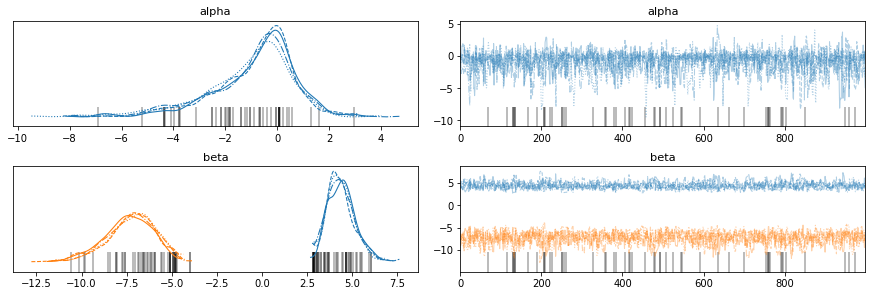

In [20]:
print(glm.summary())
glm.plot_trace()

<AxesSubplot:ylabel='Density'>

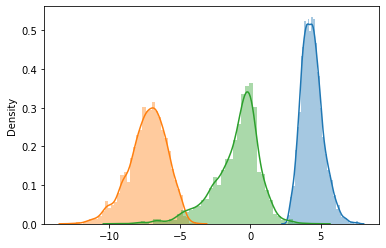

In [21]:
sns.distplot(glm.trace["beta"][:, 0], label="beta_1")
sns.distplot(glm.trace["beta"][:, 1], label="beta_2")
sns.distplot(glm.trace["alpha"], label="alpha")

Alpha: -0.5102468469515864, Beta: [ 4.14808296 -6.9159227 ]


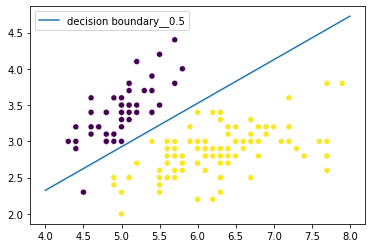

In [13]:
x = np.linspace(4, 8, 100)
sns.scatterplot(X[: , 0], X[: , 1], c=y)
for quant in [0.5]:
    alpha = np.quantile(glm.trace["alpha"], quant, axis=0)
    beta = np.quantile(glm.trace["beta"], quant, axis=0)
    print(f"Alpha: {alpha}, Beta: {beta}")

    da = - alpha / beta[1]
    dw = - beta[0] / beta[1]

    db = da + dw * x
    sns.lineplot(x, db, label=f"decision boundary__{quant}")